# 📊 Strategic Analysis of Superstore Performance
**Daily Challenge – Developers Institute**

Goal: Build a business intelligence report using US Superstore dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, IntSlider
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Upload dataset in Colab
from google.colab import files
uploaded = files.upload()

# Load dataset with proper encoding handling
file_name = list(uploaded.keys())[0]
try:
    df = pd.read_csv(file_name, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='latin1')

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

Saving Superstore.csv to Superstore (1).csv
✅ Dataset loaded successfully!
Shape: (9994, 21)


In [3]:
# Basic info
print("Columns:", df.columns.tolist())
df.info()

# Summary stats
display(df.describe())

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())


Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Reg

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000



Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Duplicate rows: 0


In [4]:
# Drop duplicates
df = df.drop_duplicates()

# Handle missing values (example: Postal Code)
if 'Postal Code' in df.columns:
    df['Postal Code'] = df['Postal Code'].fillna(0)

print("✅ Data cleaned.")


✅ Data cleaned.


In [5]:
# Convert date columns to datetime
date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

print("✅ Date conversion done.")
df[date_columns].dtypes


✅ Date conversion done.


,0
Order Date,datetime64[ns]
Ship Date,datetime64[ns]


In [6]:
# Profit Margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Order Year / Month
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month-Year'] = df['Order Date'].dt.to_period('M')

df[['Sales', 'Profit', 'Profit Margin', 'Order Year', 'Order Month']].head()


,Sales,Profit,Profit Margin,Order Year,Order Month
0,261.9600,41.9136,16.00,2016,11
1,731.9400,219.5820,30.00,2016,11
2,14.6200,6.8714,47.00,2016,6
3,957.5775,-383.0310,-40.00,2015,10
4,22.3680,2.5164,11.25,2015,10


In [7]:
# Prepare data
monthly_sales = df.groupby(['Order Month-Year', 'Category'])['Sales'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Order Month-Year'].dt.to_timestamp()

def plot_monthly_sales(category='All'):
    plt.figure(figsize=(12, 6))
    if category == 'All':
        total_monthly = df.groupby('Order Month-Year')['Sales'].sum()
        plt.plot(total_monthly.index.to_timestamp(), total_monthly.values,
                 marker='o', linewidth=2, markersize=4)
        plt.title("Monthly Sales Trend - All Categories", fontsize=16)
    else:
        category_data = monthly_sales[monthly_sales['Category'] == category]
        plt.plot(category_data['Date'], category_data['Sales'],
                 marker='o', linewidth=2, markersize=4)
        plt.title(f"Monthly Sales Trend - {category}", fontsize=16)

    plt.xlabel("Date")
    plt.ylabel("Sales ($)")
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.show()

categories = ['All'] + list(df['Category'].unique())
interact(plot_monthly_sales, category=Dropdown(options=categories, value='All', description='Category:'))


interactive(children=(Dropdown(description='Category:', options=('All', 'Furniture', 'Office Supplies', 'Techn…

<function __main__.plot_monthly_sales(category='All')>

In [11]:
# State sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=True)

def plot_top_states(top_n=10):
    plt.figure(figsize=(12, max(6, top_n * 0.4)))
    top_states = state_sales.tail(top_n)
    plt.barh(range(len(top_states)), top_states.values, color='steelblue')
    plt.yticks(range(len(top_states)), top_states.index)
    plt.xlabel("Total Sales ($)")
    plt.ylabel("State")
    plt.title(f"Top {top_n} States by Sales")

    # Use .max() method instead of max() function on ndarray
    max_val = top_states.values.max()
    for i, (state, value) in enumerate(top_states.items()):
        plt.text(value + max_val * 0.01, i, f"${value:,.0f}", va='center', fontsize=10)

    plt.grid(axis='x', alpha=0.3)
    plt.show()

interact(plot_top_states, top_n=IntSlider(min=5, max=25, value=10, description='Top N States:'))

interactive(children=(IntSlider(value=10, description='Top N States:', max=25, min=5), Output()), _dom_classes…

<function __main__.plot_top_states(top_n=10)>

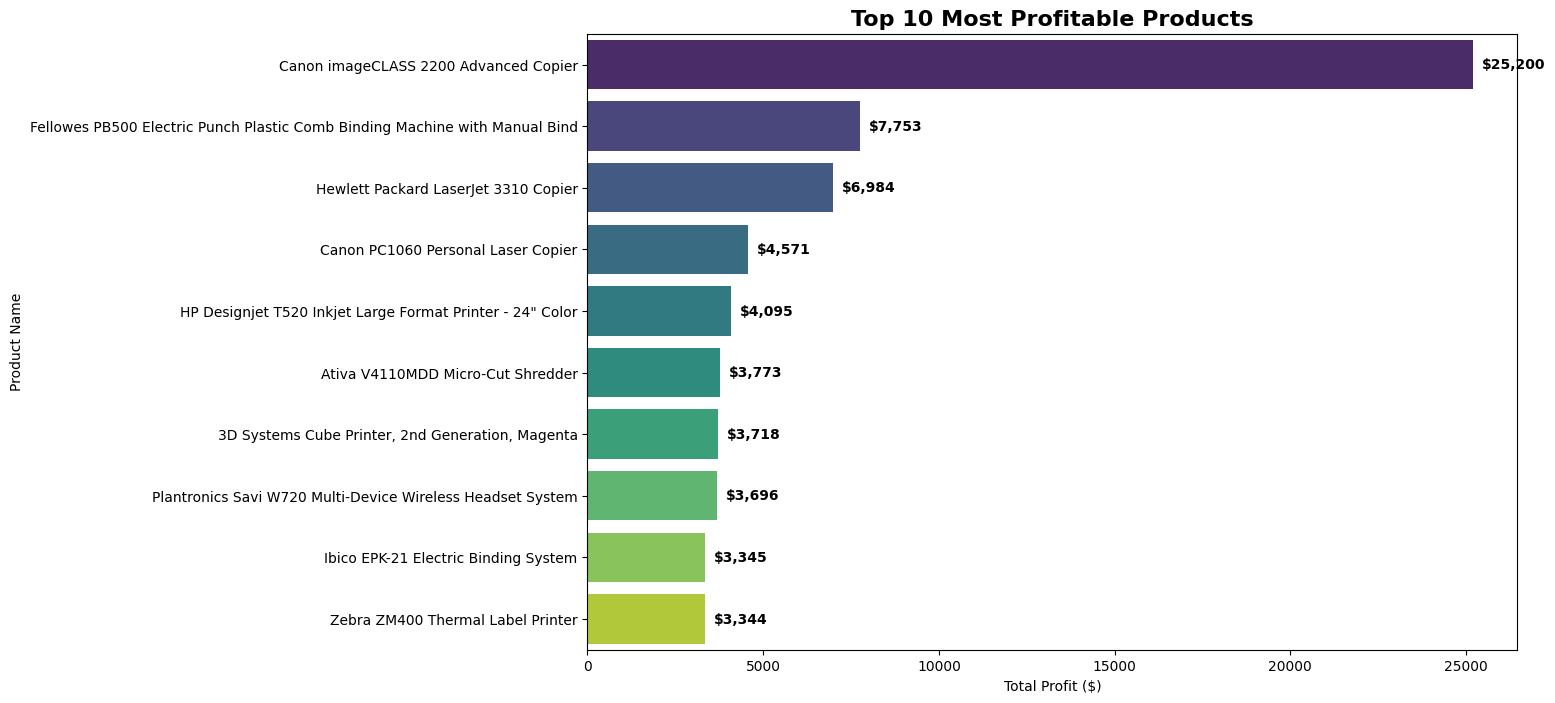

In [13]:
product_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=product_profit.values, y=product_profit.index, palette='viridis', orient='h')
plt.title("Top 10 Most Profitable Products", fontsize=16, fontweight='bold')
plt.xlabel("Total Profit ($)")
plt.ylabel("Product Name")

# Use .max() instead of max() on numpy array
max_val = product_profit.values.max()
for i, (product, profit) in enumerate(product_profit.items()):
    ax.text(profit + max_val * 0.01, i, f"${profit:,.0f}", va='center', fontweight='bold')

plt.show()


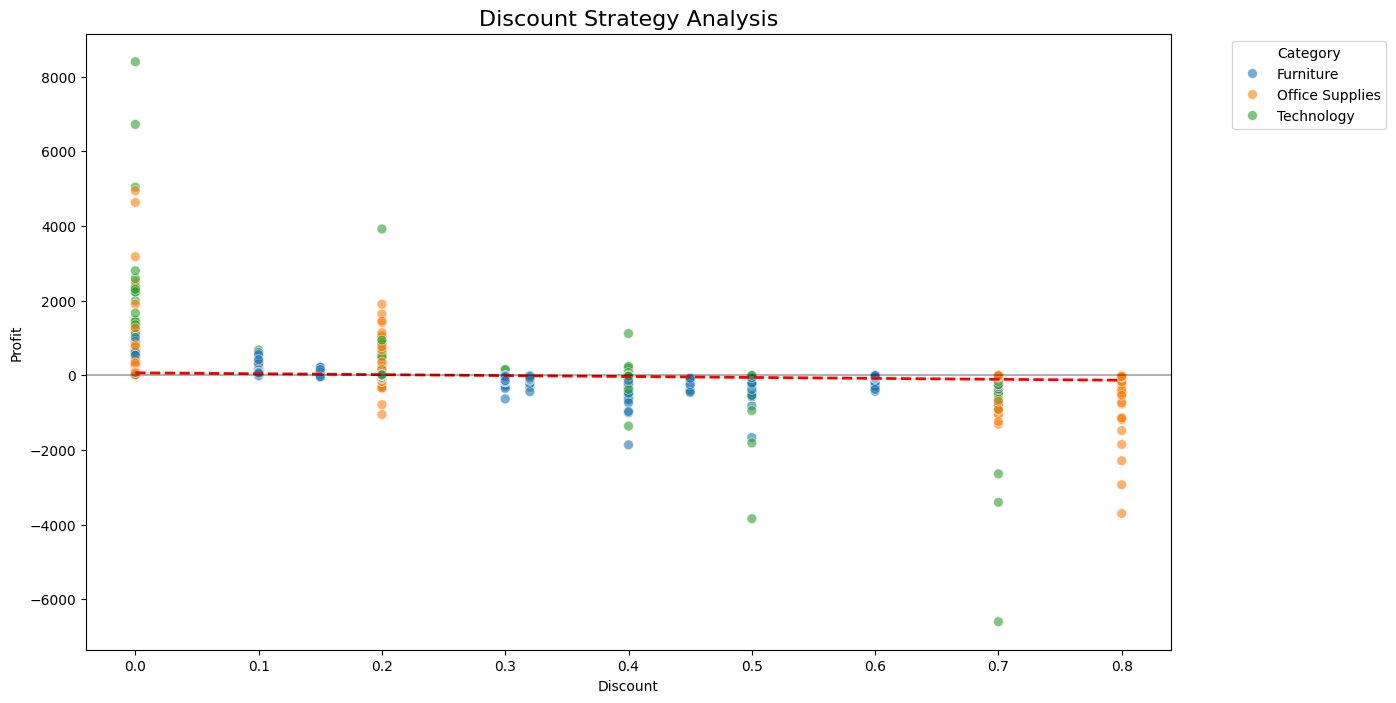

In [14]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.6, s=50)
sns.regplot(data=df, x='Discount', y='Profit', scatter=False, color='red', line_kws={'linewidth':2,'linestyle':'--'})
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title("Discount Strategy Analysis", fontsize=16)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [15]:
print("=== LIBRARY COMPARISON ===\n")
print("Matplotlib strengths: fine-grained control, interactivity, custom annotations")
print("Seaborn strengths: clean defaults, easy categorical plots, built-in stat tools")


=== LIBRARY COMPARISON ===

Matplotlib strengths: fine-grained control, interactivity, custom annotations
Seaborn strengths: clean defaults, easy categorical plots, built-in stat tools


In [16]:
print("=== EXECUTIVE SUMMARY ===\n")
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

print(f"📊 Total Revenue: ${total_sales:,.0f}")
print(f"💰 Total Profit: ${total_profit:,.0f}")
print(f"📈 Profit Margin: {profit_margin:.1f}%")
print(f"🏆 Leading Category: {df.groupby('Category')['Sales'].sum().idxmax()}")


=== EXECUTIVE SUMMARY ===

📊 Total Revenue: $2,297,201
💰 Total Profit: $286,397
📈 Profit Margin: 12.5%
🏆 Leading Category: Technology
